- HW 1 of APM598: Intro to Deep Neural Networks
- Jieshu Wang (jwang490@asu.edu) Feb 2020

In [1]:
# Ex 1. [Overfitting]

# Ex 1. a) Plot the loss l(Pk) as a function of k

import matplotlib.pyplot as plt
import numpy as np

# get the data
data = np.loadtxt('./data/data_HW1_ex1.csv',delimiter=',')
x,y = data[:,0],data[:,1]

def loss_function_mean_square_error(k_degree: int, data_x, data_y):
    polynomial_coefficients, residuals, _, _, _= np.polyfit(x=data_x, y=data_y, deg=k_degree, full=True)
    number_of_data_points = data_y.shape[0]
    mean_square_error = residuals / number_of_data_points
    return polynomial_coefficients, mean_square_error

def plot_loss_by_degree(start_degree: int, end_degree: int, data_x, data_y):
    plot_x = np.asarray(range(start_degree, end_degree+1))
    plot_y_list = []
    polynomial_coefficient_dic = {}
    for degree in range(start_degree, end_degree+1):
        polynomial_coefficients, mean_square_error = loss_function_mean_square_error(degree, data_x, data_y)
        plot_y_list.append(mean_square_error)
        polynomial_coefficient_dic[degree] = polynomial_coefficients
    plot_y = np.asarray(plot_y_list)
    plt.grid(True)
    plt.plot(plot_x,plot_y,'-')
    plt.xlabel('degree')
    plt.ylabel('mean square loss')
    plt.title("Loss as a function of k")
    print('Plot the loss as a function of k')
    plt.show()
    print('Coefficients of the polynomials with degrees 0 to 12:')
    [print(key, value) for key, value in polynomial_coefficient_dic.items()]

plot_loss_by_degree(0, 12, x, y)

Plot the loss as a function of k
Coefficients of the polynomials with degrees 0 to 12:
0 [2.22038069]
1 [ 1.356735   -0.91372385]
2 [ 0.39284984 -0.38975863  0.82121564]
3 [0.04163387 0.11440343 0.1568024  0.52982572]
4 [ 0.04504368 -0.35721266  1.29969399 -1.17848199  0.95342805]
5 [-0.02106725  0.27540971 -1.28038561  2.94876184 -2.42323518  1.23095438]
6 [ 0.01261609 -0.18359458  1.08635343 -3.25088612  5.3388026  -3.72717013
  1.45500302]
7 [  0.04054023  -0.59953585   3.53684335 -10.54853458  16.56521564
 -12.4793789    3.7162038    0.43101878]
8 [ 4.33891403e-02 -7.20696764e-01  4.94535654e+00 -1.81524540e+01
  3.86204077e+01 -4.83233971e+01  3.47948445e+01 -1.28656760e+01
  2.42479347e+00]
9 [-2.59227744e-02  5.60640883e-01 -5.10769322e+00  2.55603670e+01
 -7.67761482e+01  1.41996480e+02 -1.59468527e+02  1.03307940e+02
 -3.39814205e+01  4.75215705e+00]
10 [-6.72516312e-03  1.23351505e-01 -8.73310484e-01  2.70296528e+00
 -9.87041108e-01 -1.84140062e+01  5.88320753e+01 -8.47044014

<Figure size 640x480 with 1 Axes>

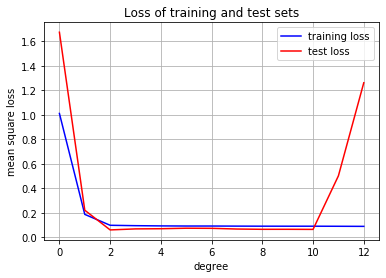

Coefficients of the polynomials on training set with degrees 0 to 12:
0 [2.18564531]
1 [ 1.27917781 -0.75560358]
2 [ 0.40614039 -0.46601076  0.90545299]
3 [ 0.06416233 -0.00822613  0.32339783  0.49661723]
4 [ 0.04724447 -0.34719079  1.19144189 -0.99376251  0.89659547]
5 [-0.03805771  0.46473407 -2.02252129  4.17502884 -3.21339501  1.36487312]
6 [ 0.00962962 -0.16280539  1.09038106 -3.54989239  6.0341002  -4.22601891
  1.53306991]
7 [  0.04003225  -0.58993648   3.44952697 -10.10848577  15.37091236
 -10.86847701   2.80152592   0.58001362]
8 [  0.04023556  -0.65027123   4.32477527 -15.33907582  31.53365716
 -38.41043496  27.55598624 -10.46504542   2.15522918]
9 [-3.03897090e-02  6.27091122e-01 -5.46565468e+00  2.62141451e+01
 -7.55633994e+01  1.34331712e+02 -1.45512240e+02  9.16732401e+01
 -2.97382917e+01  4.24322541e+00]
10 [ 1.16823744e-02 -2.77595520e-01  2.88864270e+00 -1.71868822e+01
  6.40942852e+01 -1.54709585e+02  2.41520675e+02 -2.37175038e+02
  1.38143246e+02 -4.19908787e+01  5.

In [2]:
from sklearn.model_selection import train_test_split

# b) split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

def plot_loss_on_training_and_test(start_degree: int, end_degree: int, training_x, training_y, test_x, test_y):
    plot_x = np.asarray(range(start_degree, end_degree+1))
    plot_y_training_list = []
    plot_y_test_list = []
    polynomial_coefficient_dic = {}
    error_dic = {}
    for degree in range(start_degree, end_degree+1):
        polynomial_coefficients, mean_square_error = loss_function_mean_square_error(degree, training_x, training_y)
        plot_y_training_list.append(mean_square_error)
        polynomial = np.poly1d(polynomial_coefficients)
        mse_test = sum((polynomial(x_test_value) - y_test_value)**2
                       for x_test_value, y_test_value in zip(test_x, test_y)) / test_y.shape[0]
        plot_y_test_list.append(mse_test)
        polynomial_coefficient_dic[degree] = polynomial_coefficients
        error_dic[degree] = (mean_square_error[0], mse_test, mse_test-mean_square_error[0])
    plot_y_training = np.asarray(plot_y_training_list)
    plot_y_test = np.asarray(plot_y_test_list)
    plt.figure(1)
    plt.grid(True)
    plt.plot(plot_x, plot_y_training, c='b', label='training loss')
    plt.plot(plot_x, plot_y_test, c='r', label='test loss')
    plt.xlabel('degree')
    plt.ylabel('mean square loss')
    plt.legend(loc='upper right')
    plt.title("Loss of training and test sets")
    plt.show()
    print('Coefficients of the polynomials on training set with degrees 0 to 12:')
    [print(key, value) for key, value in polynomial_coefficient_dic.items()]
    print('MSE on training set and test set with degrees 0 to 12:')
    [print(key, value) for key, value in error_dic.items()]

plot_loss_on_training_and_test(0, 12, x_train, y_train, x_test, y_test)

In [3]:
# Ex 2. gradient descent

# a) ???compute th gradient of the loss function, deduce the minimum
def regression_loss_mean_square_error(k_degree: int, data_x, data_y):
    polynomial_coefficients, residuals, _, _, _ = np.polyfit(x=data_x, y=data_y, deg=k_degree, full=True)
    number_of_data_points = data_y.shape[0]
    mean_square_error = residuals / number_of_data_points
    return polynomial_coefficients, mean_square_error

def loss_derivative_a(a, b, data_x, data_y) -> float:
    n_ = data_y.shape[0]
    sum_array = data_y - (a + b*data_x)
    sum_value = np.sum(sum_array)
    return_value = -2 * sum_value / n_
    return return_value

def loss_derivative_b(a, b, data_x, data_y)->float:
    n_ = data_y.shape[0]
    array_1 = data_y - (a + b*data_x)
    sum_value = array_1 @ data_x.T
    return_value = -2 * sum_value / n_
    return return_value

def loss_gradients(parameters, data_x, data_y):
    # parameters is np.array
    a = parameters[0]
    b = parameters[1]
    return np.array([loss_derivative_a(a,b,data_x,data_y), loss_derivative_b(a,b,data_x,data_y)])

linear_parameters, mse_on_data = regression_loss_mean_square_error(1, x, y)
linear_parameter_b = linear_parameters[0]
linear_parameter_a = linear_parameters[1] 
reversed_linear_parameters = np.array([linear_parameter_a, linear_parameter_b])
print(f'The minimum loss is {mse_on_data}'
      f'\ny = {linear_parameter_a} + {linear_parameter_b}*x')

The minimum loss is [0.19195039]
y = -0.9137238501103322 + 1.3567350006495915*x


The convergence rate after 100 steps is 0.9676389088273757.


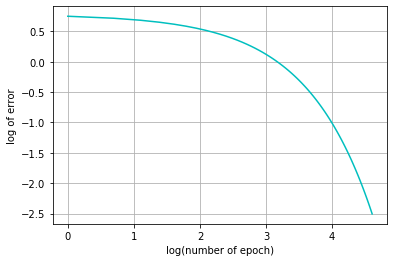

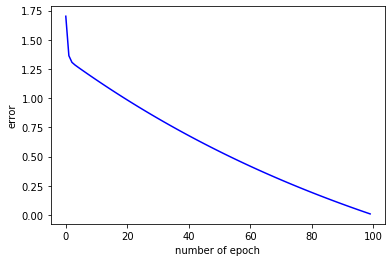

In [9]:
# Ex2 b) how fast the parameters converge

import numpy as np
import torch
import torch.nn as nn
from torch.optim.adagrad import Adagrad
from torch.optim.rmsprop import RMSprop

my_linear_model = nn.Linear(1, 1)
my_loss = nn.MSELoss(reduction='mean')
optimizer_sgd = torch.optim.SGD(my_linear_model.parameters(),lr=0.05)
def train_model_certain_times(optimizer, data_x, data_y, num_epoch: int):
    tensor_x = torch.as_tensor(data_x, dtype=float)
    tensor_y = torch.as_tensor(data_y)
    my_linear_model.bias.data.fill_(1.8)
    my_linear_model.weight.data.fill_(1.4)
    end_parameters = np.asarray([my_linear_model.bias.data.tolist()[0], my_linear_model.weight.data.tolist()[0][0]])
    parameters = []
    loss = 0.0
    losses = []
    for epoch in range(num_epoch):
        parameters.append(end_parameters)
        optimizer.zero_grad()
        tensor_y_hat = my_linear_model(tensor_x.float().view(100,1))
        loss = my_loss(tensor_y_hat, tensor_y.float().view(100,1))
        loss.backward()
        optimizer.step()
        end_parameters = np.asarray([my_linear_model.bias.data.tolist()[0], my_linear_model.weight.data.tolist()[0][0]])       
        losses.append(loss)
    # error is the ||(a_100, b_100)-(a_n, b_n)||
    errors = [np.linalg.norm(end_parameters-param_n) for param_n in parameters]
    return losses, errors, end_parameters

def log_regression_plot(optimizer, data_x, data_y, num_epoch: int):
    
    plot_x_log = np.log(range(1,num_epoch+1))
    plot_x = range(num_epoch)
    _, errors, _= train_model_certain_times(optimizer, data_x, data_y, num_epoch)
    plot_y = np.log(errors)
    coefficients = np.polyfit(plot_x, plot_y, 1)
    #plot
    plt.grid(True)
    colors = ['b', 'g', 'r', 'm', 'y', 'c']
    m = coefficients[0]
    b = coefficients[1]
    convergence_rate = np.exp(m)
    print(f'The convergence rate after {num_epoch} steps is {convergence_rate}.')
    plot_y_ = m*plot_x + b
    color = colors.pop()
    plt.plot(plot_x_log, plot_y_, c=color)
    plt.xlabel('log(number of epoch)')
    plt.ylabel('log of error')
    plt.show()

def plot_without_log(optimizer, data_x, data_y, num_epoch: int):
    plot_x = range(num_epoch)
    _, errors, _= train_model_certain_times(optimizer, data_x, data_y, num_epoch)
    plot_y = errors
    plt.plot(plot_x, plot_y, c='b')
    plt.xlabel('number of epoch')
    plt.ylabel('error')
    plt.show()
    plt.show()
    
log_regression_plot(optimizer_sgd, x, y, 100)
plot_without_log(optimizer_sgd, x, y, 100)

SGD without momentum: The convergence rate after 100 steps is 0.9676389088273757.
SGD with momentum: The convergence rate after 100 steps is 0.9416686525139462.
SGD Nesterov: The convergence rate after 100 steps is 0.9308129379415091.
SGD without momentum: The convergence rate after 100 steps is 0.9676389088273757.
SGD with momentum: The convergence rate after 100 steps is 0.9416686525139462.
SGD Nesterov: The convergence rate after 100 steps is 0.9308129379415091.
Adam: The convergence rate after 100 steps is 0.9695290510750563.
RMSprop: The convergence rate after 100 steps is 0.944930930367241.
Adagrad: The convergence rate after 100 steps is 0.9619282714345648.


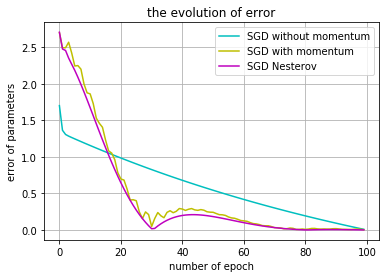

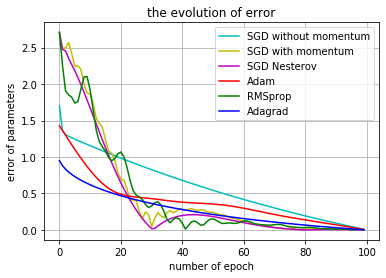

In [14]:
# c) and extra) how fast different method converge
my_linear_models = [nn.Linear(1, 1) for i in range(10)]
my_loss = nn.MSELoss(reduction='mean')

hyper_parameters = dict()
hyper_parameters['number_of_epoch'] = 100
hyper_parameters['learning_rate'] = 0.05
hyper_parameters['batch_size'] = 100
hyper_parameters['momentum'] = 0.9
hyper_parameters['lr_decay'] = 0.0
hyper_parameters['weight_decay'] = 0.0

optimizer_no_momentum = torch.optim.SGD(my_linear_models[0].parameters(),
                                        lr=hyper_parameters['learning_rate'],
                                        weight_decay=hyper_parameters['weight_decay'])
optimizer_sgd = torch.optim.SGD(my_linear_models[1].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum'],
                                nesterov=False,
                                weight_decay=hyper_parameters['weight_decay'])
optimizer_nesterov = torch.optim.SGD(my_linear_models[2].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum'],
                                nesterov=True)
optimizer_adam = torch.optim.Adam(my_linear_models[3].parameters(),
                                  lr=hyper_parameters['learning_rate'],
                                  amsgrad=False,
                                  weight_decay=hyper_parameters['weight_decay'])
optimizer_rms = RMSprop(my_linear_models[4].parameters(),
                        lr=hyper_parameters['learning_rate'],
                        momentum=hyper_parameters['momentum'],
                        weight_decay=hyper_parameters['weight_decay'])
optimizer_adagrad = Adagrad(my_linear_models[5].parameters(),
                            lr=hyper_parameters['learning_rate'],
                            lr_decay=hyper_parameters['lr_decay'],
                            weight_decay=hyper_parameters['weight_decay'])

optimizer_dict = {'SGD without momentum': (optimizer_no_momentum, my_linear_models[0]),
                  'SGD with momentum': (optimizer_sgd, my_linear_models[1]),
                  'SGD Nesterov': (optimizer_nesterov, my_linear_models[2]),
                  'Adam': (optimizer_adam, my_linear_models[3]),
                  'RMSprop': (optimizer_rms, my_linear_models[4]),
                  'Adagrad': (optimizer_adagrad, my_linear_models[5])}

optimizer_dict_SGD = {'SGD without momentum': (torch.optim.SGD(my_linear_models[6].parameters(),
                                                               lr=hyper_parameters['learning_rate']), 
                                               my_linear_models[6]),
                      'SGD with momentum': (torch.optim.SGD(my_linear_models[7].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum']), my_linear_models[7]),
                      'SGD Nesterov': (torch.optim.SGD(my_linear_models[8].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum'],
                                nesterov=True), my_linear_models[8])}

def train_model_certain_times_2(optimizer_tuple, data_x, data_y, num_epoch: int):
    loss = 0.0
    optimizer = optimizer_tuple[0]
    model = optimizer_tuple[1]
    tensor_x = torch.as_tensor(data_x, dtype=float)
    tensor_y = torch.as_tensor(data_y)
    model.bias.data.fill_(1.8)
    model.weight.data.fill_(1.4)
    end_parameters = np.asarray([model.bias.data.tolist()[0], model.weight.data.tolist()[0][0]])
    parameters = []
    errors = []
    for epoch in range(num_epoch):
        parameters.append(end_parameters)
        optimizer.zero_grad()
        tensor_y_hat = model(tensor_x.float().view(100,1))
        loss = my_loss(tensor_y_hat, tensor_y.float().view(100,1))
        loss.backward()
        optimizer.step()
        end_parameters = np.asarray([model.bias.data.tolist()[0], model.weight.data.tolist()[0][0]])      
    errors = [np.linalg.norm(end_parameters-param_n) for param_n in parameters]
    return errors, end_parameters

def multiple_log_regression_plot(optimizer_dictionary, data_x, data_y, num_epoch: int, is_log=True):
    plot_x_log = np.log(range(1,num_epoch+1))
    plot_x = range(num_epoch)
    plot_y_dictionary = dict()
    for key, optimizer_tuple in optimizer_dictionary.items():    
        errors, _ = train_model_certain_times_2(optimizer_tuple, data_x, data_y, num_epoch)
        plot_y = np.log(errors)
        coefficients = np.polyfit(plot_x, plot_y, 1)
        m = coefficients[0]
        b = coefficients[1]
        convergence_rate = np.exp(m)
        plot_y_ = m*plot_x + b 
        plot_y_dictionary[key] = (convergence_rate, plot_y_, errors)
    #plot
    plt.grid(True)
    colors = ['b', 'g', 'r', 'm', 'y', 'c']
    for key, (convergence_rate, plot_y_, errors) in plot_y_dictionary.items():
        print(f'{key}: The convergence rate after {num_epoch} steps is {convergence_rate}.')
        color = colors.pop()
        if is_log is True:
            plt.plot(plot_x_log, plot_y_, c=color, label=key)
        if is_log is False:
            plt.plot(plot_x, errors, c=color, label=key)
    if is_log is True:
        plt.xlabel('log(number of epoch)')
        plt.ylabel('log of error of parameters')
        plt.title('convergence rate')
    if is_log is False:
        plt.xlabel('number of epoch')
        plt.ylabel('error of parameters')
        plt.title('the evolution of error')
    if is_log is True:
        plt.legend(loc='lower left')
    if is_log is False:
        plt.legend(loc='upper right')
    plt.show()

# multiple_log_regression_plot(optimizer_dict_SGD, x, y, 100)
# multiple_log_regression_plot(optimizer_dict, x, y, 100)

multiple_log_regression_plot(optimizer_dict_SGD, x, y, 100, False)
multiple_log_regression_plot(optimizer_dict, x, y, 100, False)

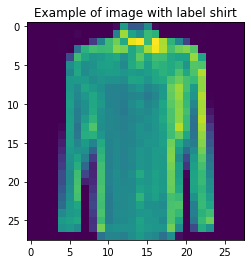

In [10]:
# Ex 3

from torchvision import datasets
import matplotlib.pyplot as plt
# Download and load
data_collection = datasets.FashionMNIST('data_fashionMNIST', train=True, download=True) 
# Illustration
label_fashion = dict([(0,'T-shirt'),(1,'trouser'),
                      (2,'pullover'),(3,'dress'),
                      (4,'coat'),(5,'sandal'),
                      (6,'shirt'),(7,'sneaker'),
                      (8,'bag'),(9,'boot')])
X_img,y = data_collection.__getitem__(140)
plt.figure(1)
plt.clf()
plt.imshow(X_img)
plt.title("Example of image with label "+label_fashion[y])
plt.show()

In [ ]:
# a) Adapt the linear classifier for the MNIST-data set to the new data-base.
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim.adagrad import Adagrad
from torch.optim.rmsprop import RMSprop

my_linear_model = nn.Linear(784, 10)
my_loss = nn.CrossEntropyLoss()

w = my_linear_model.state_dict()['weight']
bias = my_linear_model.state_dict()['bias']
plt.imshow(w[2].view(28,28),vmin=-.5,vmax=.5,cmap='seismic')
plt.title('Initial template for w_3')
plt.colorbar(extend="both")
plt.show()

# hyper-parameters
hyper_parameters = dict()
hyper_parameters['num_of_epoch'] = 40
hyper_parameters['learning_rate'] = 0.0001
hyper_parameters['batch_size'] = 4
hyper_parameters['momentum'] = 0.9

# data_loader and optimizer
fashion_MNIST_training_set_tensor = datasets.FashionMNIST('./data/data_fashionMNIST', train=True, 
                                                          download=True, transform=transforms.ToTensor())
fashion_MNIST_test_set_tensor = datasets.FashionMNIST('./data/data_fashionMNIST', train=False, 
                                                          download=True, transform=transforms.ToTensor())
my_loader_train = DataLoader(fashion_MNIST_training_set_tensor, shuffle=True,
                             batch_size=hyper_parameters['batch_size'])
my_loader_test = DataLoader(fashion_MNIST_test_set_tensor, shuffle=False,
                            batch_size=hyper_parameters['batch_size'])

my_linear_models = [nn.Linear(784, 10) for i in range(6)]
optimizer_no_momentum = torch.optim.SGD(my_linear_models[0].parameters(),
                                        lr=hyper_parameters['learning_rate'])
optimizer_sgd = torch.optim.SGD(my_linear_models[1].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum'],
                                nesterov=False)
optimizer_nesterov = torch.optim.SGD(my_linear_models[2].parameters(),
                                lr=hyper_parameters['learning_rate'],
                                momentum=hyper_parameters['momentum'],
                                nesterov=True)
optimizer_adam = torch.optim.Adam(my_linear_models[3].parameters(),
                                  lr=hyper_parameters['learning_rate'],
                                  amsgrad=False)
optimizer_rms = RMSprop(my_linear_models[4].parameters(),
                        lr=hyper_parameters['learning_rate'],
                        momentum=hyper_parameters['momentum'])
optimizer_adagrad = Adagrad(my_linear_models[5].parameters(),
                            lr=hyper_parameters['learning_rate'])


optimizer_dict = {'SGD without momentum': (optimizer_no_momentum, my_linear_models[0]),
                  'SGD with momentum': (optimizer_sgd, my_linear_models[1]),
                  'SGD Nesterov': (optimizer_nesterov, my_linear_models[2]),
                  'Adam': (optimizer_adam, my_linear_models[3]),
                  'RMSprop': (optimizer_rms, my_linear_models[4]),
                  'Adagrad': (optimizer_adagrad, my_linear_models[5])}

def train_model(optimizer, model):
    plot_x = []
    plot_loss = []
    for epoch in range(hyper_parameters['num_of_epoch']):
        print(f'-- epoch {epoch} --')
        running_loss = 0.0
        mini_batch = 0
        plot_x.append(epoch)
        for X, y in my_loader_train:
            optimizer.zero_grad()
            N, _, nX, nY = X.size()
            score = model(X.view(N, nX*nY))
            loss = my_loss(score, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.detach().numpy()
            mini_batch += 1
        plot_loss.append(running_loss/mini_batch)
        print(f'average loss: {running_loss/mini_batch}')
    return plot_loss

# train_model(optimizer_adagrad)
def train_with_each_optimizer_plot(optimizer_dictionary):
    plot_x = list(range(hyper_parameters['num_of_epoch']))
    loss_dict = dict()
    for key, (optimizer, model) in optimizer_dictionary.items():
        print(f'\nModel: {key}')
        losses = train_model(optimizer, model)
        loss_dict[key] = losses
    plt.figure(1)
    plt.grid(True)
    colors = ['b', 'g', 'r', 'm', 'y', 'c']
    for key, losses in loss_dict.items(): 
        color = colors.pop()
        plt.plot(plot_x, losses, c=color, label=key)
    plt.xlabel('number of epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

adagrad_dict = {'Adagrad': optimizer_dict['Adagrad']}
another_optimizer_dict = {'SGD Nesterov': optimizer_dict['SGD Nesterov'],
                          'RMSprop': optimizer_dict['RMSprop'],
                          'Adam': optimizer_dict['Adam'],
                          'Adagrad': optimizer_dict['Adagrad']}

train_with_each_optimizer_plot(optimizer_dict)